In [1]:
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

(0.0, 1.0)

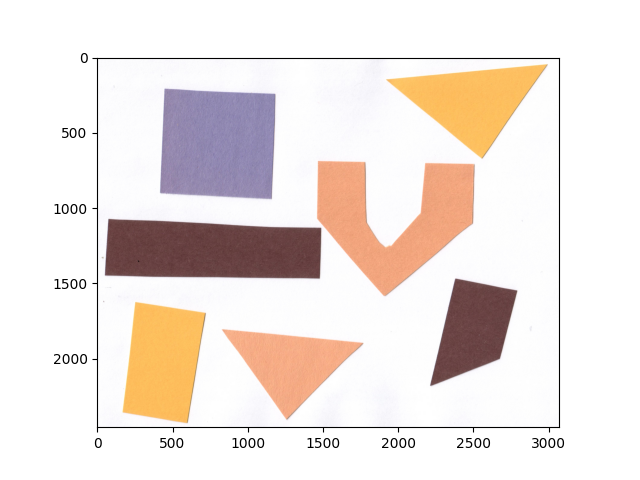

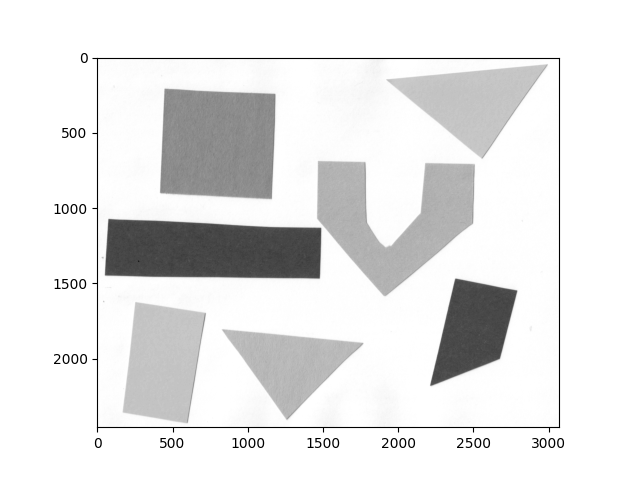

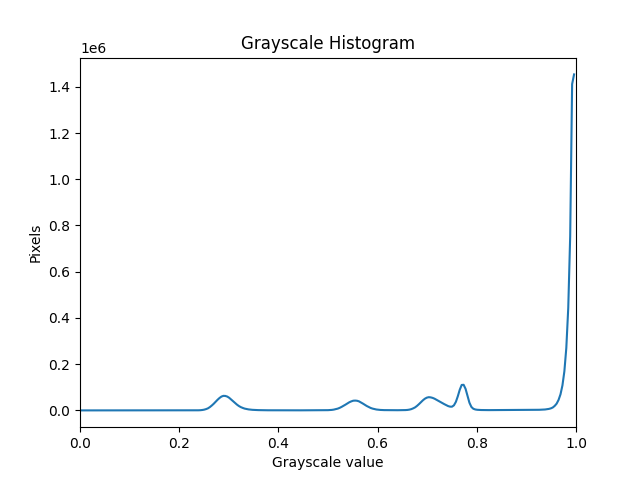

In [2]:
# Simple Thresholding

shapes01 = iio.imread('tutorial_figures/data/shapes-01.jpg')

fig, ax = plt.subplots()
ax.imshow(shapes01)

#convert to gray scale
gray_shapes = ski.color.rgb2gray(shapes01)
# Blur to denoise
blurred_shapes = ski.filters.gaussian(gray_shapes, sigma=1.0)

fig, ax = plt.subplots()
ax.imshow(blurred_shapes, cmap="gray")

# Generate histogram to find good threshold for gray
histogram, bin_edges = np.histogram(blurred_shapes, bins = 256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("Grayscale value")
ax.set_ylabel("Pixels")
ax.set_xlim(0, 1.0)

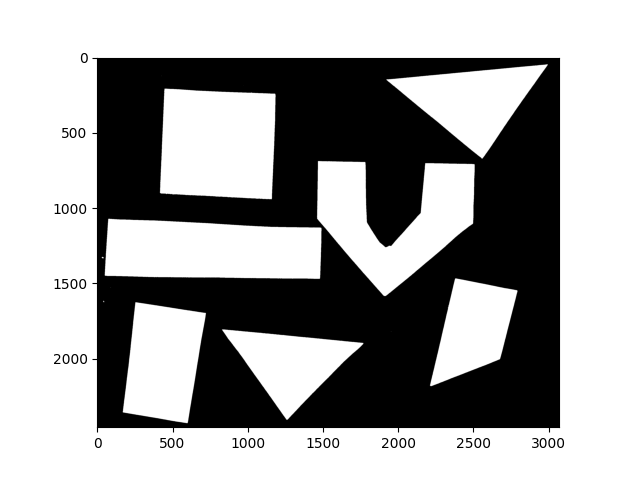

In [3]:
# From histogram, a good threshold will be t = 0.8

# Apply threshold
t=0.85
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

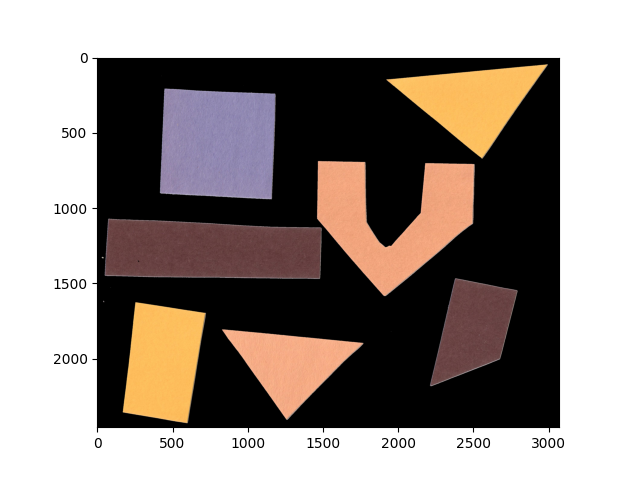

In [4]:
# use binary mask to select interersting part of image

selection = shapes01.copy()
selection[~binary_mask]=0

fig, ax = plt.subplots()
ax.imshow(selection)


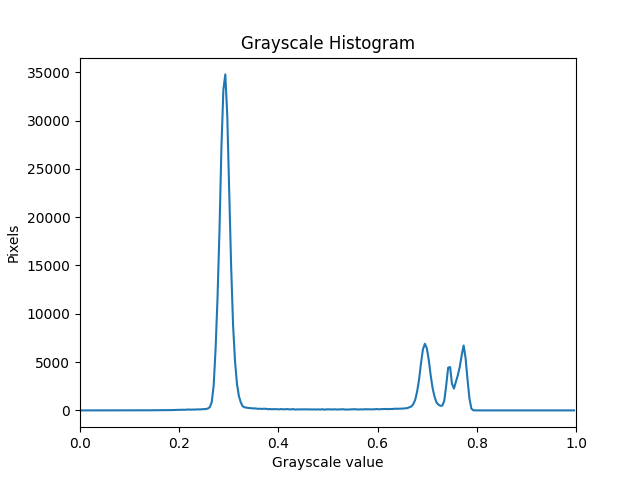

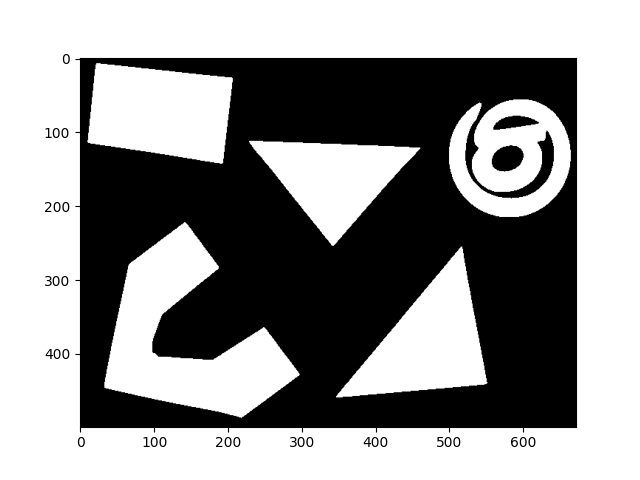

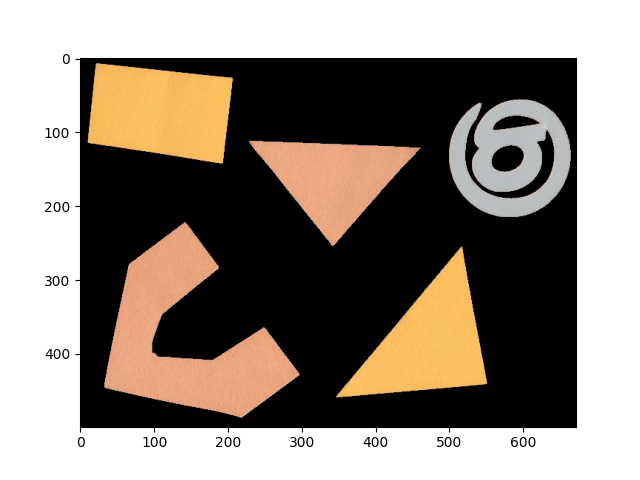

In [5]:
shapes02 = iio.imread(uri="tutorial_figures/data/shapes-02.jpg")
shapes02_gray = ski.color.rgb2gray(shapes02)
shapes02_blurred = ski.filters.gaussian(shapes02_gray, sigma=1)

histogram, bin_edges = np.histogram(shapes02_blurred, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("Grayscale value")
ax.set_ylabel("Pixels")
ax.set_xlim(0, 1.0)

t=0.5

binary_mask = shapes02_blurred > t
fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

selection = shapes02.copy()
selection[~binary_mask] = 0
fig, ax = plt.subplots()

ax.imshow(selection)




Found automatic threshold t = 0.40111663171652573.


/var/folders/bq/2ch2v5d94vx2qsk361d44hl00000gq/T/ipykernel_99731/556005237.py:18: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (400, 602, 3) looks like that of an RGB image.
  t = ski.filters.threshold_otsu(roots_blurred)


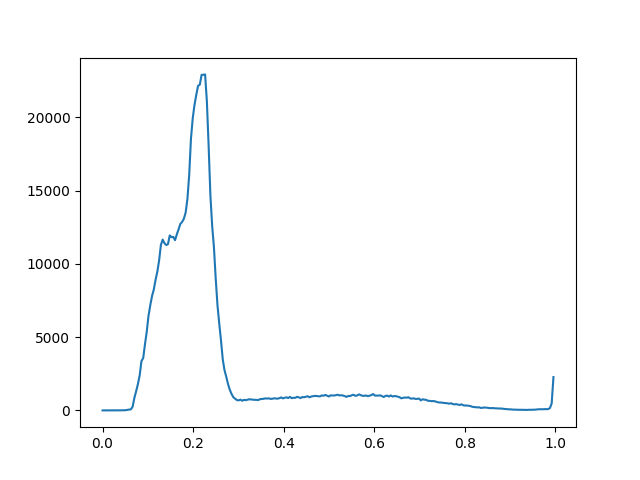

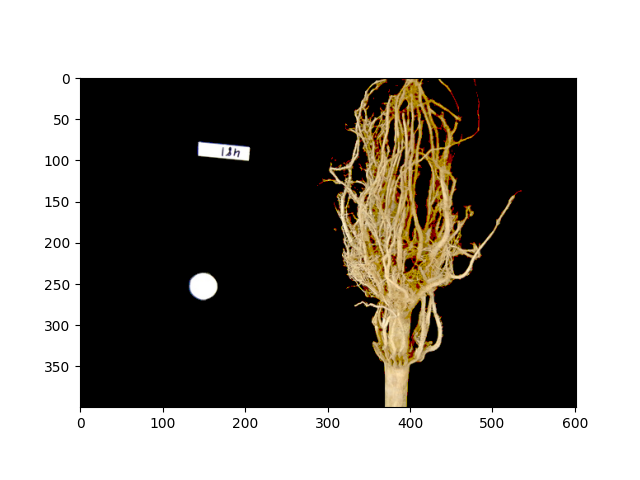

In [6]:
# Automatic Thresholding

# Otsu's method
#1. Denoise an image before thresholding by applying blur filter

maize_roots = iio.imread(uri="tutorial_figures/data/maize-root-cluster.jpg")

#1 Denoise

roots_blurred = ski.filters.gaussian(maize_roots, sigma=1)

#2. Histogram of blurred image
histogram, bin_edges = np.histogram(roots_blurred, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)

#3. Find threshold
t = ski.filters.threshold_otsu(roots_blurred)
print(f"Found automatic threshold t = {t}.")

#4. Binary mask
binary_mask = roots_blurred > t

#5. Select from image
selection = maize_roots.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
ax.imshow(selection)

tutorial_figures/data/trial-016.jpg,0.046261136968085106
tutorial_figures/data/trial-216.jpg,0.13712067819148935
tutorial_figures/data/trial-020.jpg,0.05887167553191489
tutorial_figures/data/trial-293.jpg,0.1319044215425532


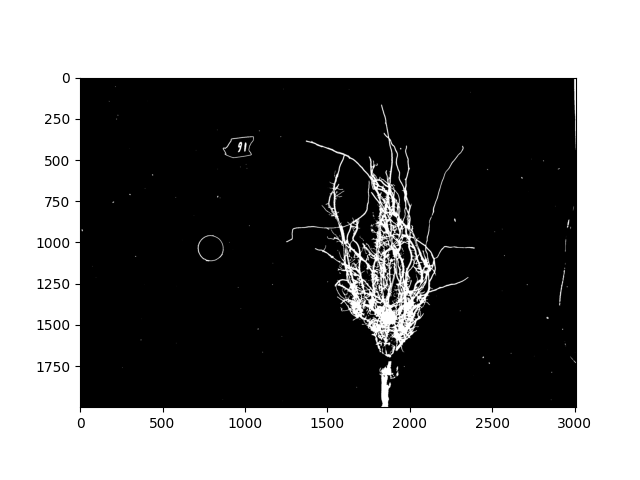

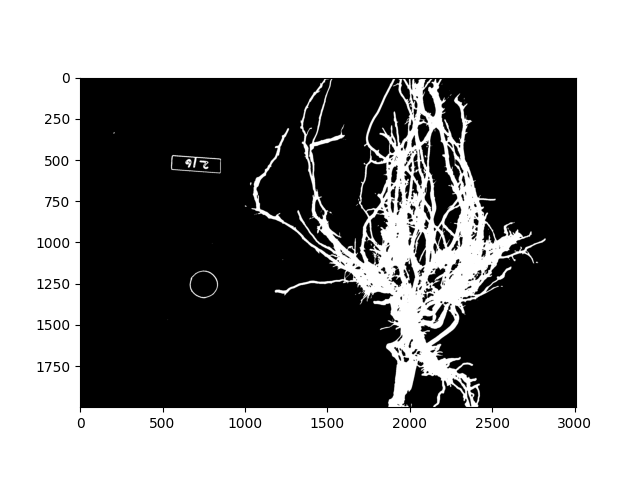

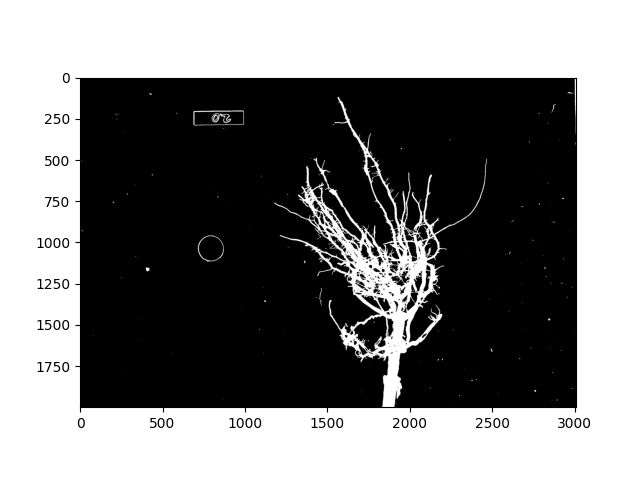

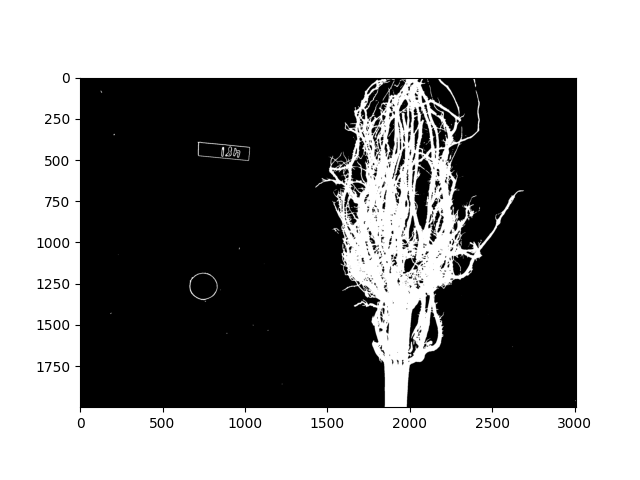

In [7]:
# Application: Measuring Root Mass

def find_mass_ratio(filename, sigma=1.0):
    # Read the image
    image = iio.imread(uri=filename, mode="L")

    # Blur the image
    image_blurred = ski.filters.gaussian(image, sigma = sigma)

    # Remove white label
    binary_mask = image_blurred < 0.95

    # Find threshold
    t = ski.filters.threshold_otsu(image=image_blurred[binary_mask])
    
    # Create binary mask -> True = 1, False = 0
    binary_mask =  (image_blurred > t) & (image_blurred < 0.95)

    fig, ax = plt.subplots()
    ax.imshow(binary_mask, cmap="gray")

    # Count number of pixels in binary img, and compare with number of pixels in image
    root_pixels = np.count_nonzero(binary_mask)
    w = binary_mask.shape[1]
    h = binary_mask.shape[0]
    density = root_pixels / (w*h)

    return density

all_files = glob.glob("tutorial_figures/data/trial-*.jpg")

for filename in all_files:
    density = find_mass_ratio(filename=filename, sigma=1.5)
    #output in format suitable for .csv
    print(filename, density, sep=",")


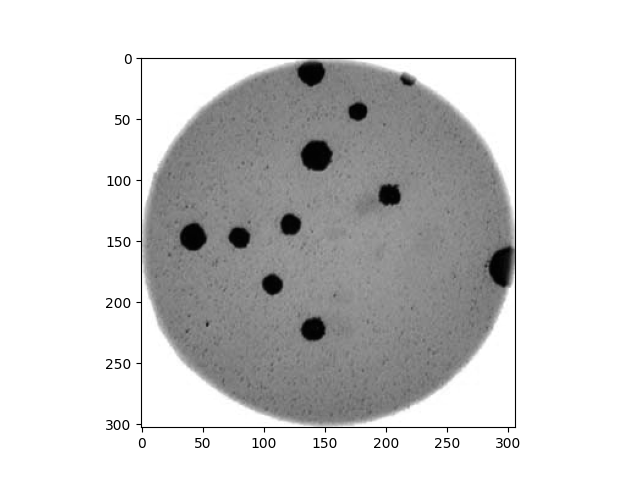

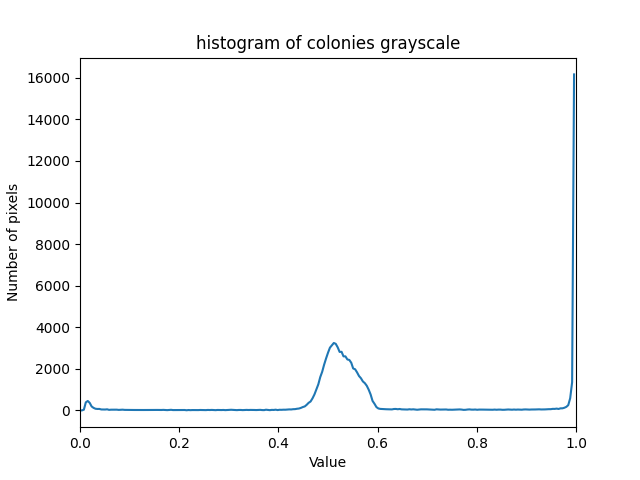

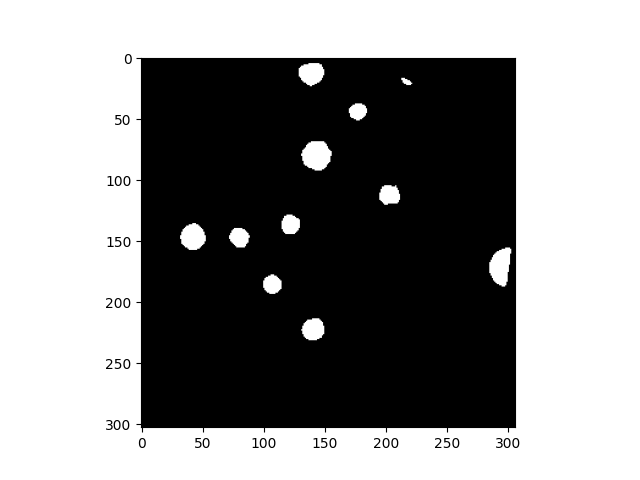

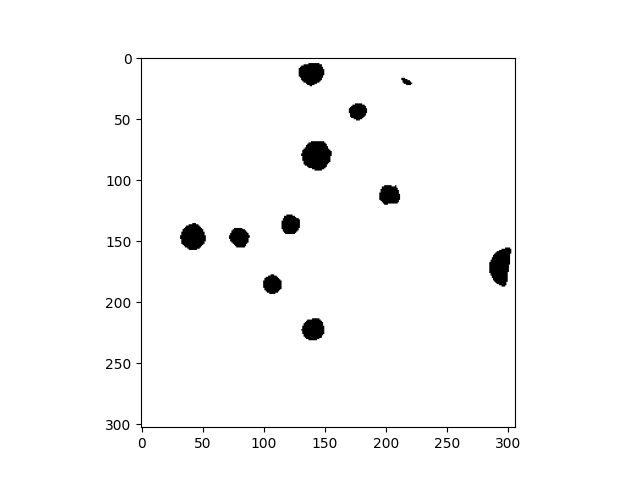

In [8]:
# Thresholding a bacteria colony image:

colonies = iio.imread(uri="tutorial_figures/data/colonies-01.tif")
colonies = ski.color.rgb2gray(colonies)
fig, ax = plt.subplots()
ax.imshow(colonies, cmap="gray")

# Create Histogram
colonies_blurred = ski.filters.gaussian(colonies, sigma = 1.0)

histogram, bin_edges = np.histogram(colonies_blurred, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("histogram of colonies grayscale")
ax.set_xlabel("Value")
ax.set_ylabel("Number of pixels")
ax.set_xlim(0, 1.0)

# Selecting bacteria colonies
t = 0.2
binary_mask = colonies_blurred < t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

selection = colonies.copy()
selection[~binary_mask] = 255

fig, ax = plt.subplots()
ax.imshow(selection, cmap="gray")
